                        Нижегородский государственный университет имени Н. И. Лобачевского

                                          Радиофизический факультет

                                            Кафедра математики
                                            
####                 Отчет по лабораторной работе "Численное решение систем линейных уравнений, численное интегрирование"

                                              
                                                 Вариант 14
                                                                                  
                                                                                  
                                                                                  
                                                                                  
                                                                          Выполнил: Котов А.в , 430 гр.
                                          
                                                                          Проверил: Шиндин А. В.

                                         Нижний Новгород, 2016 год.

### Дана система:
$$n^3x_{i}=\sum \limits_{j=0}^n {\frac {1+j+j^2} {1+j+i^2}x_j} +\int ln \left (10+i+exp(-i*t)\right) \,dt, i=2,\cdots,n$$

###   1) Задача.
1. Выбрать свой вариант системы (номер варианта остается с предыдущей лабораторной работы). Кроме самой системы в варианте должны быть указаны:
 * число уравнений системы
 * требуемый метод/методы решения системы
 * необходимая относительная точность решения системы
 * требуемый метод вычисления интеграла
 * необходимая относительная точность вычисления интеграла (если не указана, то брать — 0,01).

2.  Вычислить определенный интеграл двумя методами
 * Заданным методом
 * С помощью функции numpy.trapz(…), графически провести сравнение с результатами предыдущего метода. Разницу объяснить.

3. Построить график подынтегральной функции, а также график зависимости значения интеграла от номера итерации предлагаемого метода численного интегрирования.

4. Решить систему заданным методом 
 * Для 1000 уравнений
 * Для 10000 уравнений

5. Построить график решения X(i), а также график зависимости нормы решения от номера итерации предлагаемого метода численного решения системы.

6. Решить систему с помощью функции numpy.linalg.solve(…). Результат графически сравнить с решением, полученным в пункте 4. Разницу объяснить.

###   2) Цель работы:
* Освоить методы численного интегрирования. Вычислить определенный интеграл с использованием **формулы Буля** с относительной точностью **0,01**
* Научиться численно решать системы линейных уравнений. Решение систему из 1000 и 10000 уравнений **методом релаксации**  с относительной точностью **0,01**.

## 1.
Вычислить определенный интеграл заданным методом. 
Построить график подынтегральной функции, а также график зависимости
значения интеграла от номера итерации предлагаемого метода численного
интегрирования.

Предположим, что интегрируемая функция принадлежит классу $C[α,β]$
и задана сетка $ω_n$ отрезка $[α, β]$. Для получения весовых коэффициентов
квадратурных формул используем следующую процедуру. Рассмотрим за
дачу, обратную к задаче дискретизации, т.е. задачу восстановления эле
мента $f ∈ H[α,β]$ по заданной сеточной функции $f_n ∈ Rn$. Из общей теории
известно, что данная задача имеет не единственное решение и наиболее
просто решается при помощи интерполяционных многочленов, если имеет
ся априорная информация о гладкости искомых функции.

Формула Буля (n = 4)
$$\sum _{{k=0}}^{4}C_{k}f_{k}(x)=\frac{α-β}{90}(7f(α)+32f(\frac{3α+β}{4}+12f(\frac{α+β}{2}+32f(\frac{α+3β}{4}+7f(β)) $$

## График подынтегральной функции

In [7]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', family='Verdana')
import matplotlib.pyplot as plt
from numpy import log,exp,linalg,log10
import numpy as np
def f(t,i):
    return log(10+i+exp(-i*t))
a=1
b=5
n=100

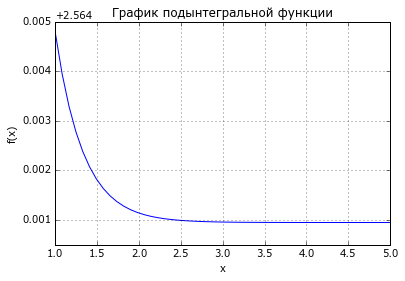

In [8]:
#i=int(input())
i=3
def g(t):
    return log(10+i+exp(-i*t))
t=np.linspace(a,b)
y=g(t)
plt.title('График подынтегральной функции')
plt.grid(True)
plt.ylabel('f(x)')
plt.xlabel('x')
plt.plot(t,y)

## График зависимости значения интеграла от номера итерации предлагаемого метода численного интегрирования

График зависимости значения интеграла от номера итерации предлагаемого метода численного интегрирования


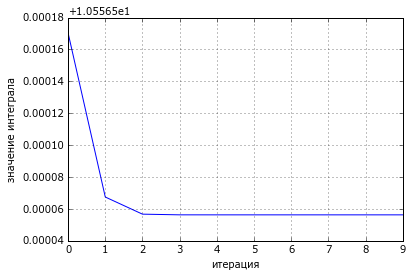

In [9]:
#i=int(input())
i=3
k=4
u=10
g=0
Inte=np.zeros((u,1))
for g in range(u):
    #k=k/(u+1)
    In=0
    a=1
    h=int((b-a)/k)
    for j in range (h): 
        p=(k/90)*(7*f(a,i+1)+32*f((3*a+(a+k))/4,i+1)+12*f((a+(a+k))/2,i+1)+32*f((a+3*(a+k))/4,i+1)+7*f(a+k,i+1))
        In+=p
        a=(a+k)
    Inte[g][0]=In
    #if (Inte[g][0]-Inte[g-1][0])/Inte[g][0]<0.01:        
        #print(k)
        #break 
    k=k/2
#print(y)
#print(Inte)
print('График зависимости значения интеграла от номера итерации предлагаемого метода численного интегрирования')
plt.grid(True)
plt.ylabel('значение интеграла')
plt.xlabel('итерация')
plt.plot(Inte)   
a=1

# Задание 3+

## Вычисление определенного интеграла с помощью функции numpy.trapz(…).

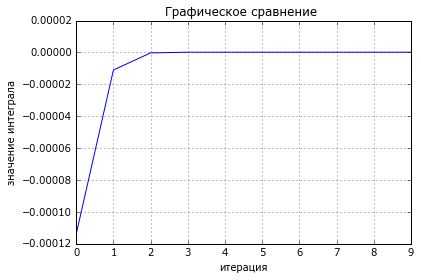

In [11]:
inte=np.zeros((u,1))
c=np.zeros((u,1))
z=4
i=3
for hj in range(100): 
    for j in np.arange(u):
        t=np.linspace(a,b,2*hj)
        inte[j]=np.trapz(f(t,i+1),t)
    #c[j][0]=Inte[j][0]-inte[j][0]
        z=z/2
#print(inte)
plt.grid(True)
plt.title('Графическое сравнение ')
plt.ylabel('значение интеграла')
plt.xlabel('итерация')
plt.plot(inte-Inte)
#plt.show()
# plt.plot(Inte)
#plt.show()
#print('Разница')
#plt.plot(c)


# Задание №4

Среди явных одношаговых итерационных методов наибольшее распространение получил метод верхних релаксаций. Это связано с тем, что метод верхних релаксаций содержит свободный параметрw , изменяя который можно получать различную скорость сходимости итерационного процесса.
Наиболее эффективно этот метод применяется при решении множества близких алгебраических систем линейных уравнений. На первом этапе проводится решение одной из систем с различными значениями итерационного параметраw и из анализа скорости сходимости итерационного процесса выбирается оптимальное значение этого параметра. Затем все остальные системы решаются с выбранным значением $w$ .
\begin{matrix}
a_{11}x_1 + \ldots + a_{1n}x_n  =  b_1\\
a_{21}x_1 + \ldots + a_{2n}x_n =  b_2\\
  \ldots  \\
a_{n1}x_1 + \ldots + a_{nn}x_n  =  b_n\\
\end{matrix}
приводится к виду
\begin{matrix}
x_1 + b_{12}x_2 + \ldots + b_{1n}x_n + c_1  =  0\\
  \ldots  \\
b_{n1}x_1 + b_{n2}x_2 + \ldots + x_n + c_n  =  0\\
\end{matrix}
После вычисления iй компоненты $k+1$ приближения метода Зейделя $$x_{i}^{{(k+1)}}=c_{{i1}}x_{{1}}^{{(k)}}+c_{{i2}}x_{{2}}^{{(k)}}+c_{{i3}}x_{{3}}^{{(k)}}+...+d_{1}$$
Производится дополнительное смещение этой компоненты на 
$$ (w-1)(x_{i}^{(k+1)}-x_{i}^{(k)}) $$
Таким образом
$$X^{{(k+1)}}=(1-w)X^{{(k)}}+wB_1X^{{(k+1)}}+wB_2X^{{(k)}}+wI$$
Вычисление $B_1$ и $B_2$

In [12]:
I=np.zeros((n,1))
In=0
for i in range (n):
    while a<b:
        k=2
        In+=(k/90)*(7*f(a,i+1)+32*f((3*a+(a+k))/4,i+1)+12*f((a+(a+k))/2,i+1)+32*f((a+3*(a+k))/4,i+1)+7*f(a+k,i+1))
        a=(a+k)
        #print(In)
    I[i]=In
    In=0
    a=1
#plt.plot(I)
#print(I)
a=1
b1=np.zeros((n,n))
b2=np.zeros((n,n))
for i in range (n):
    for j in range (n):
        if i<j:
            b1[i][j]=(1/(n**3-1))*((1+j+1+(j+1)**2)/(1+j+1+(i+1)**2))
        if i>j:
            b2[i][j]=(1/(n**3-1))*((1+j+1+(j+1)**2)/(1+j+1+(i+1)**2))
#np.set_printoptions(linewidth=1000,suppress=True,precision=6)
#print(b1)
#print('==============================================================================================================')
#print(b2)

## Решение системы уравнений

10
[  1.00000000e+00   1.54012452e-01   2.37114228e-02   3.65545717e-03
   5.70384094e-04   9.61129153e-05   2.32444331e-05   1.20547990e-05
   1.03374210e-05   1.00739700e-05   1.00335751e-05   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00]


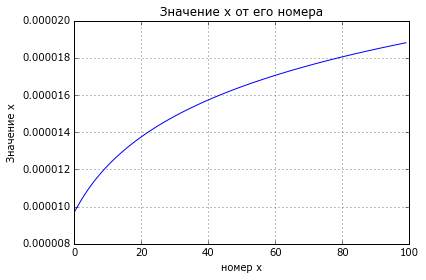

In [13]:
l=15
#w=int(input())
X=np.zeros((n,l))
x=np.zeros((n,1))
w=0.85
for p in range (n):
    X[p][0]=1
for j in range (1,l):
    for i in range (n):
        u=0
        v=0
        for k in range (n):
            if k>i:
                v+=w*b1[i][k]*X[k][j-1]
            if k<i:
                u+=w*b2[i][k]*X[k][j]  
        X[i][j]=(1-w)*X[i][j-1]+w*I[i]/(n**3-1)+u+v             
    if abs(X[i][j]-X[i][j-1])/(X[i][j])<0.01 :
        l=j
        print(l)
        for k in range (i+1):
            x[k][0]=X[k][j]
        break
#print(X)
#print(x)
print(X[1])
plt.grid(True)
plt.title('Значение x от его номера')
plt.ylabel('Значение x')
plt.xlabel('номер x')
plt.plot(x)

## Решение системы уравнений с помощью numpy.linalg.solve

График разности значений x(посчианных встроенной функцией) и х(посчитанных программой)


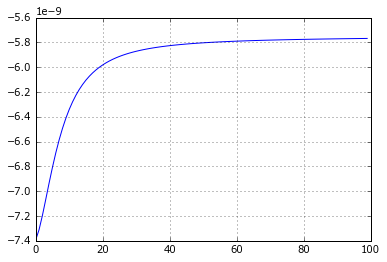

In [14]:
b=np.zeros((n,n))
b=-b1-b2
for j in range (n):
    b[j][j]=1
#print(I/(n**3-1))
ar=np.zeros((n,1))
ar=np.linalg.solve(b,I/(n**3-1))
R=np.zeros((n,1))
R=ar-x
print('График разности значений x(посчианных встроенной функцией) и х(посчитанных программой)')
plt.grid(True)
plt.plot(R)

##  График зависимости нормы решения от номера итерации предлагаемого метода численного решения системы.

Норма: 0.000159964086866


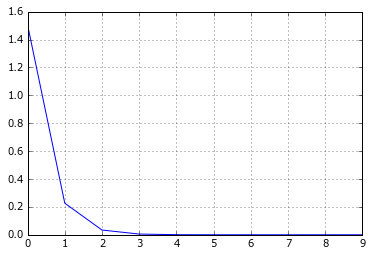

In [15]:
j=l
s=np.zeros(j)
q=np.zeros(j)
M=np.transpose(X)
#print(M)
y=np.linalg.norm(np.transpose(ar))
for i in range (j):
    s[i]=np.linalg.norm(np.transpose(M[i+1]))
    q[i]=y
plt.grid(True)
plt.plot(s)
print('Норма:',y)
#plt.show()
plt.plot(q)

## Для n=10000

In [4]:
%matplotlib inline
import matplotlib
matplotlib.rc('font', family='Verdana')
from numpy import log,exp,linalg
import matplotlib.pyplot as plt
import numpy as np
def f(t,i):
    return log(10+i+exp(-i*t))
a=1
b=5
n=10000
I=np.zeros((n,1))
In=0
for i in range (n):
    while a<b:
        k=2
        In+=(k/90)*(7*f(a,i+1)+32*f((3*a+(a+k))/4,i+1)+12*f((a+(a+k))/2,i+1)+32*f((a+3*(a+k))/4,i+1)+7*f(a+k,i+1))
        a=(a+k)
        #print(In)
    I[i]=In
    In=0
    a=1
b1=np.zeros((n,n))
b2=np.zeros((n,n))
for i in range (n):
    for j in range (n):
        if i<j:
            b1[i][j]=(1/(n**3-1))*((1+j+1+(j+1)**2)/(1+j+1+(i+1)**2))
        if i>j:
            b2[i][j]=(1/(n**3-1))*((1+j+1+(j+1)**2)/(1+j+1+(i+1)**2))

1
2
3
4
4


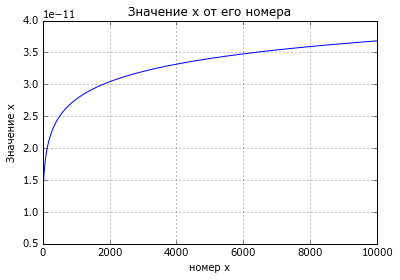

In [5]:
l=15
#w=int(input())
X=np.zeros((n,l))
x=np.zeros((n,1))
w=0.85
for p in range (n):
    X[p][0]=0
for j in range (1,l):
    for i in range (n):
        u=0
        v=0
        for k in range (n):
            if k>i:
                v+=w*b1[i][k]*X[k][j-1]
            if k<i:
                u+=w*b2[i][k]*X[k][j]  
        X[i][j]=(1-w)*X[i][j-1]+w*I[i]/(n**3-1)+u+v
        x[i][0]=X[i][j]
    print(j)
    if abs(X[i][j]-X[i][j-1])/X[i][j]<0.01: 
        break
#print(X)
plt.title('Значение x от его номера')
plt.ylabel('Значение x')
plt.xlabel('номер x')
plt.grid(True)
print(j)
plt.plot(x)